<a href="https://colab.research.google.com/github/anushkaupadhyay/Python-Projects/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix, accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco Customer Churn.csv to Telco Customer Churn.csv


In [ ]:
telco_data = pd.read_csv('Telco Customer Churn.csv')

In [ ]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking if there's null values in any column
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telco_data.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
#clean TotalCharges variable

def clean_id(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
a = telco_data.copy()
a['TotalCharges'] = a['TotalCharges'] .apply(clean_id)

In [ ]:
#exploring what could be the dirty values in the total_charges column
b = list(a[a['TotalCharges'].isnull()].index)

In [ ]:
b

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [ ]:
telco_data.loc[b]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
telco_data[telco_data.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
telco_data['TotalCharges'] = telco_data['TotalCharges'] .apply(clean_id)

In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#putting all object columns in object_columns to use for vizualisation purposes

object_columns = list(telco_data.select_dtypes(include=['object']).columns)
object_columns.remove('customerID')
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
#putting all numeric columns in numeric_columns to use for vizualisation purposes

numeric_columns = list(telco_data.select_dtypes(include=['int64', 'float64']).columns)
numeric_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

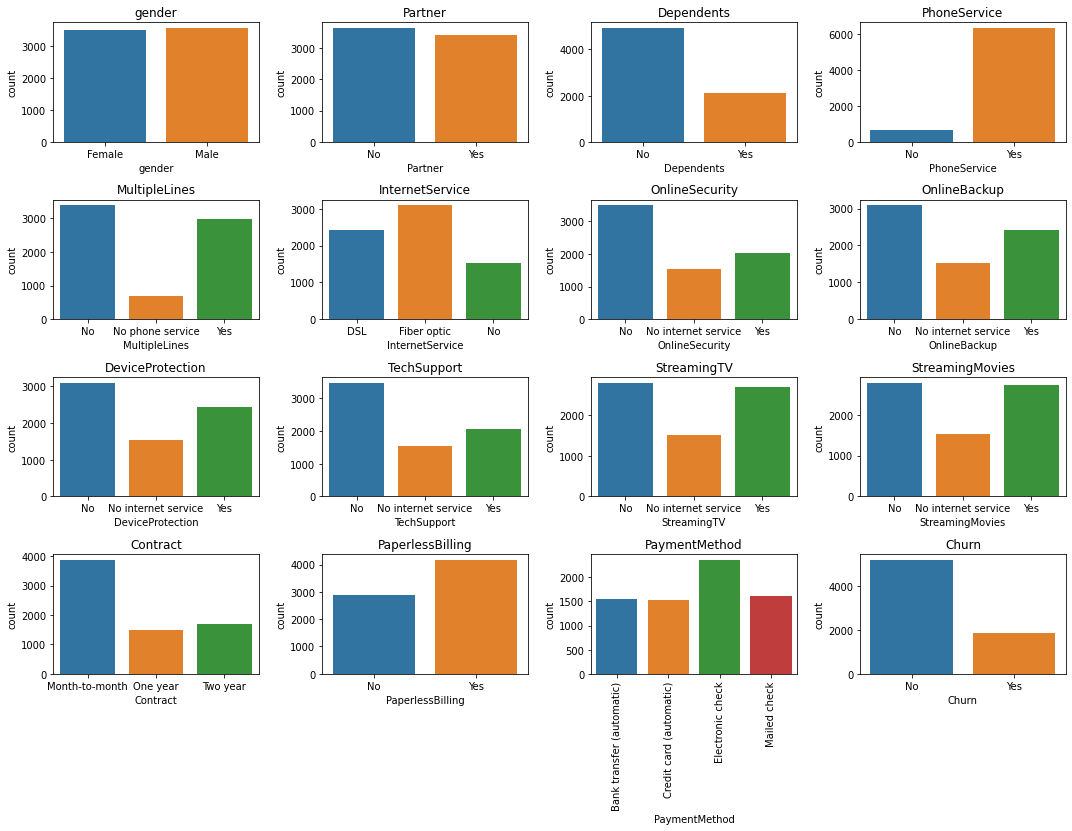

In [ ]:
#visualizing all categorical variables in telco_data

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

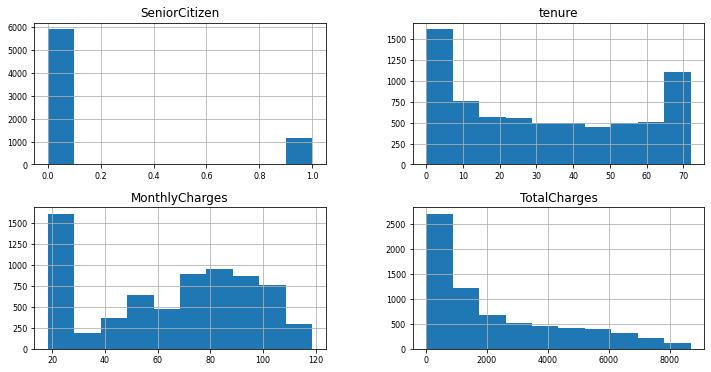

In [ ]:
#vizualizing all the numeric columns

telco_data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

In [ ]:
telco_data_churn = telco_data[telco_data['Churn']=='Yes']
telco_data_no_churn = telco_data[telco_data['Churn']=='No']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

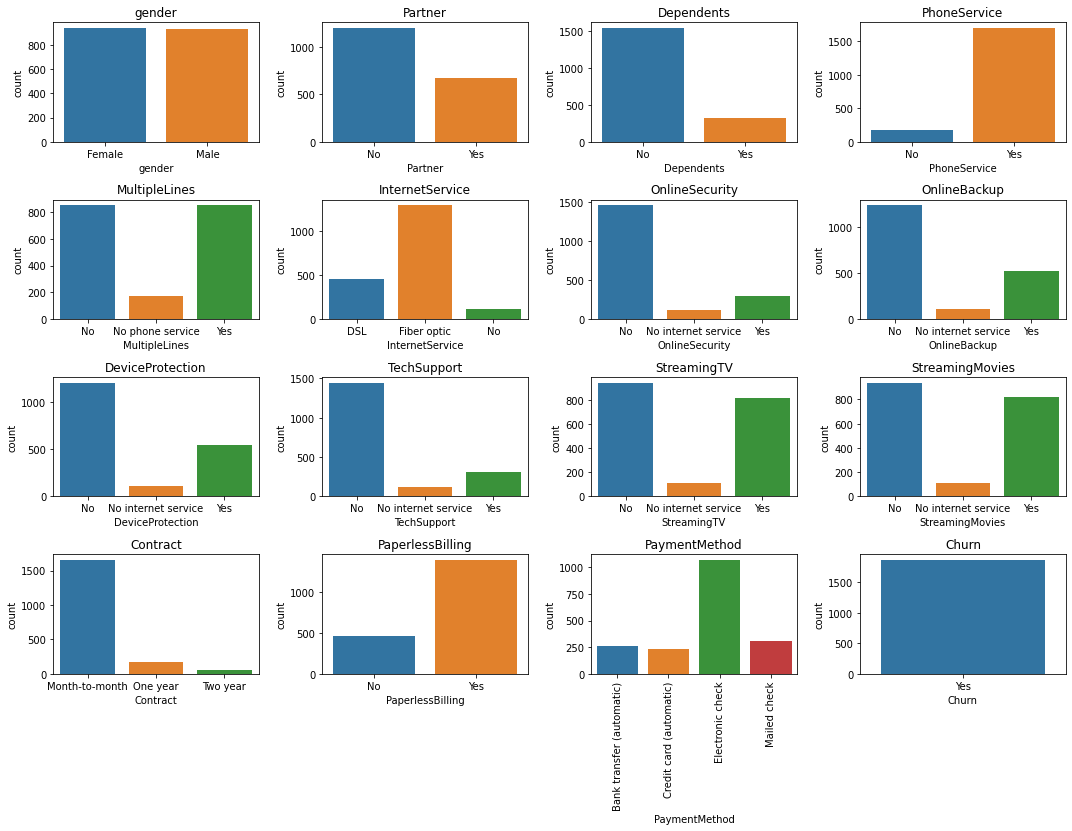

In [ ]:
#visualizing all categorical variables in telco_data_churn

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data_churn[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

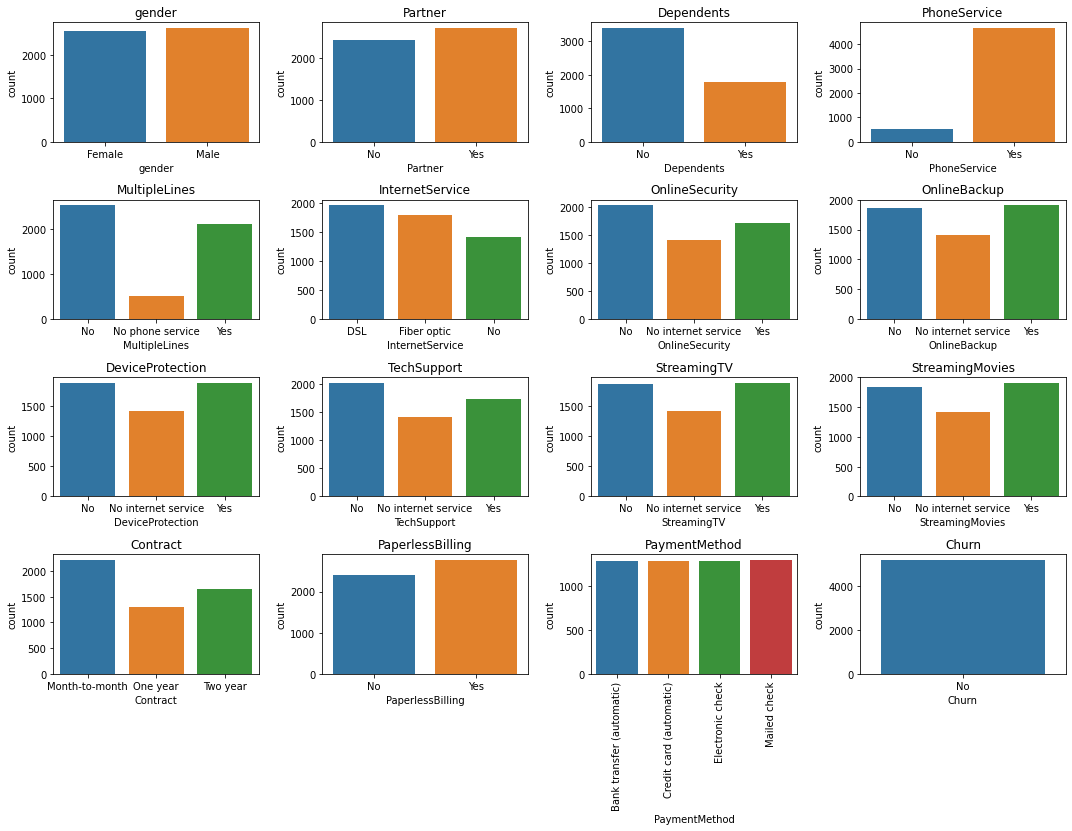

In [ ]:
#vizualising all categorical variables in telco_data_no_churn

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data_no_churn[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

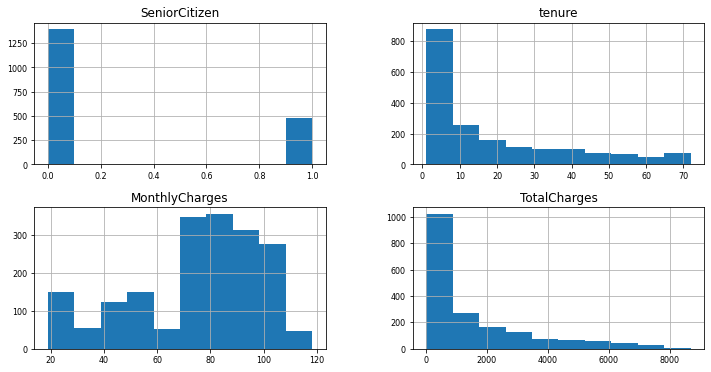

In [ ]:
##vizualising all numeric variables in telco_data_churn

telco_data_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

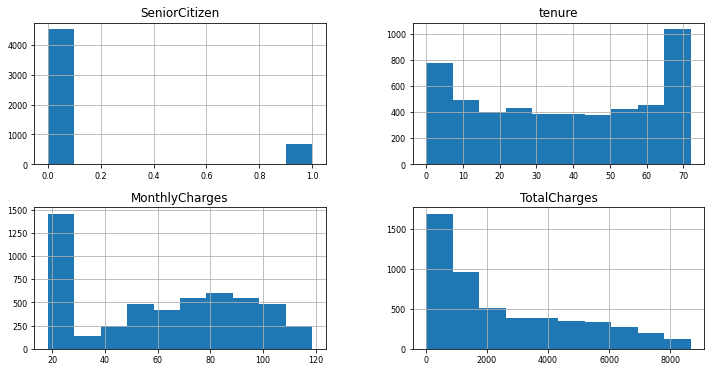

In [ ]:
##vizualising all numeric variables in telco_data_no_churn

telco_data_no_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

In [ ]:

telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#imputing null values with median
telco_data['TotalCharges'] = telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].median())

In [ ]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Putting predicors data in X, churn values in y

#using one hot encoding to encode categorical variables

X = telco_data.copy().drop(columns = ['customerID'])
y = X['Churn']

labelencoder = LabelEncoder()
y = pd.Series(labelencoder.fit_transform(y))

dummy_cols = object_columns.copy()
dummy_cols.remove('Churn')

X =  pd.get_dummies(X, columns = dummy_cols).drop(columns = ['Churn'])

In [ ]:
print(X.head())
print(y.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85              1   
1              0      34           56.95       1889.50              0   
2              0       2           53.85        108.15              0   
3              0      45           42.30       1840.75              0   
4              0       2           70.70        151.65              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0               

In [ ]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [ ]:
X_train.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

In [ ]:
y_train

2707    1
3901    0
1514    0
6349    0
1346    1
       ..
2422    0
278     0
4637    0
928     0
1332    0
Length: 5282, dtype: int64

In [ ]:
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50, 100],
              "max_features": [1, 3, 7, 11, 15],
              
              }
#f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='roc_auc')

grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

grid.best_estimator_.feature_importances_

Grid-Search with AUC
Best parameters: {'max_features': 11, 'n_estimators': 100}
Best cross-validation score (AUC)): 0.827


array([0.0188694 , 0.13887376, 0.14511724, 0.17377897, 0.01836   ,
       0.01705989, 0.01376626, 0.01391287, 0.01204569, 0.01173545,
       0.00286191, 0.00251981, 0.01211394, 0.00289713, 0.01207588,
       0.0109827 , 0.02846418, 0.00199924, 0.04305836, 0.00207642,
       0.00848352, 0.01532215, 0.00037579, 0.01164342, 0.01308373,
       0.00126531, 0.01084589, 0.03308477, 0.00217742, 0.00824847,
       0.00948307, 0.00101177, 0.01037998, 0.00979055, 0.00024013,
       0.01061271, 0.05600479, 0.00796988, 0.01667262, 0.01506333,
       0.01441006, 0.01086452, 0.01110713, 0.0282295 , 0.0110604 ])

In [ ]:
# fitting randomforest again with the best hyperparameters received from gridsearchcv
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_features = 7)
rnd_clf.fit(X_train, y_train)
#for name, importance in zip(list(X_train.columns), rnd_clf.feature_importances_):
 # print(name, "=", importance)
 

RandomForestClassifier(max_features=7, n_jobs=-1, random_state=42)

In [ ]:
y_pr=rnd_clf.predict(X_test)
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, rnd_clf.predict_proba(X_test)[:, 1])))

print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

Test set AUC: 0.810
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1294
           1       0.60      0.48      0.53       467

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



array([[1146,  148],
       [ 244,  223]])

In [ ]:
thresholds = np.linspace(0, 1, 100)
y_scores = rnd_clf.predict_proba(X_test)[:, 1]
scores = []
for threshold in thresholds:
    y_hat = (y_scores > threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=y_test.values),
                 precision_score(y_pred=y_hat, y_true=y_test.values),
                 fbeta_score(y_pred=y_hat, y_true=y_test.values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.7300884955752213 13


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


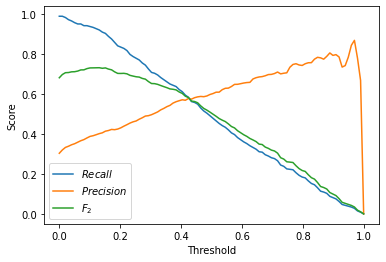

In [ ]:
#plotting precision, recall vs thresholds

plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()


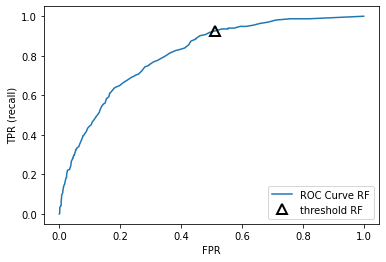

In [ ]:
#plotting ROC curve

from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rnd_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


F_2 = list(scores[:, 2])
close_default_rf = thresholds[F_2.index(max(F_2))]
close_default_rf = np.argmin(np.abs(thresholds_rf - close_default_rf))



plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
features = list(X_train.columns)
importances = list(rnd_clf.feature_importances_)
feature_importances_df = pd.DataFrame({'feature' : features, 'importance' : importances})
feature_importances_df = feature_importances_df.sort_values(by = 'importance', ascending=False)

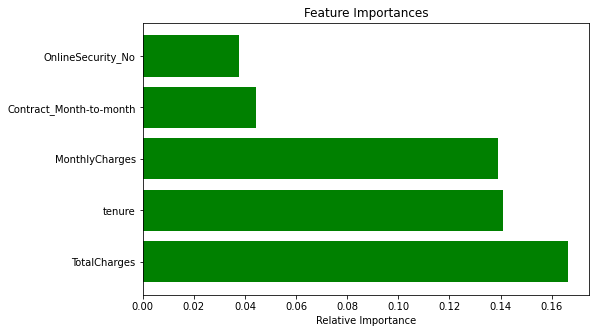

In [ ]:
#plotting top 5 features learnt.

plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.barh(range(0,5), feature_importances_df['importance'][0:5], color='green', align='center')
plt.yticks(range(0,5), [i for i in feature_importances_df.feature[0:5]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
telco_data[telco_data['Churn'] == 'Yes'].shape[0]/telco_data.shape[0]

0.2653698707936959

In [ ]:
#logistic regression

clf = LogisticRegression()

# use a full grid over all parameters
param_grid = {'penalty' : ['l1', 'l2'],
              "C": [0.1,1,10]
              }
f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='roc_auc')

grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

#grid.best_estimator_.feature_importances_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Grid-Search with AUC
Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score (AUC)): 0.847


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following

In [ ]:
y_predict = grid.predict(X_test)
print('The AUC score with the best hyperparameters is ', end = '')
print(roc_auc_score(y_test, y_predict))

print ("Classification Report: ")
print (classification_report(y_test, y_predict))

The AUC score with the best hyperparameters is 0.714970924941006
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1294
           1       0.63      0.55      0.58       467

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.79      0.79      0.79      1761



In [ ]:
confusion_matrix(y_test, y_predict)

array([[1141,  153],
       [ 211,  256]])

In [ ]:
#using standard scaler as a preprocessig step for PCA

df = X.copy()
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.439916,-1.277445,-1.160323,-0.994242,1.009559,-1.009559,-1.034530,1.034530,0.654012,-0.654012,...,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.173244,-0.990532,0.990532,0.966622,-0.966622,0.654012,-0.654012,...,-0.796070,-1.105970,1.944582,-0.562975,1.205113,-1.205113,-0.529885,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.959674,-0.990532,0.990532,0.966622,-0.966622,0.654012,-0.654012,...,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.194766,-0.990532,0.990532,0.966622,-0.966622,0.654012,-0.654012,...,-0.796070,-1.105970,1.944582,-0.562975,1.205113,-1.205113,1.887201,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.940470,1.009559,-1.009559,0.966622,-0.966622,0.654012,-0.654012,...,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.128655,-0.990532,0.990532,-1.034530,1.034530,-1.529024,1.529024,...,1.256171,-1.105970,1.944582,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,-0.711026,1.835513
7039,-0.439916,1.613701,1.277533,2.243151,1.009559,-1.009559,-1.034530,1.034530,-1.529024,1.529024,...,1.256171,-1.105970,1.944582,-0.562975,-0.829798,0.829798,-0.529885,1.904590,-0.711026,-0.544807
7040,-0.439916,-0.870241,-1.168632,-0.854469,1.009559,-1.009559,-1.034530,1.034530,-1.529024,1.529024,...,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,1.406418,-0.544807
7041,2.273159,-1.155283,0.320338,-0.872062,-0.990532,0.990532,-1.034530,1.034530,0.654012,-0.654012,...,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,-0.711026,1.835513


In [ ]:
#visualizing using PCA

pca_df = pd.DataFrame(y.copy())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
pca_df.columns = ['Churn','pca-one', 'pca-two']
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.25233265 0.1350128 ]


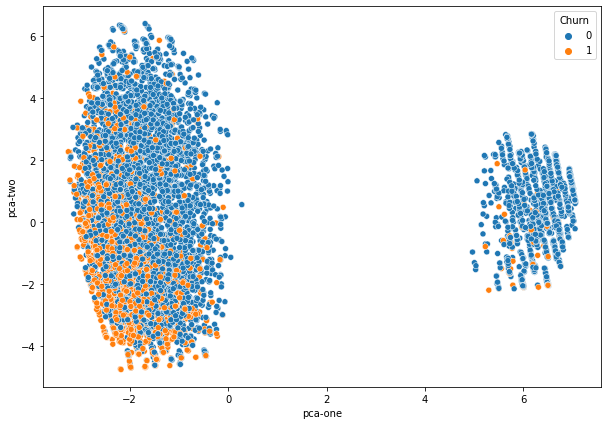

In [ ]:

plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="pca-one", y="pca-two",hue='Churn', data=pca_df)

In [ ]:

pca_df

,Churn,pca-one,pca-two
0,0,-1.999288,-3.070668
1,0,-0.332740,-1.207497
2,1,-0.864344,-2.904898
3,0,-1.062056,-0.108202
4,1,-1.837096,-4.210774
...,...,...,...
7038,0,-1.223623,3.068076
7039,0,-2.393543,4.339483
7040,0,-1.660906,-2.320205
7041,1,-1.973834,-2.718334


In [ ]:
df1 = df.copy()
lda_df = y.copy()
lda = LDA()
lda_X = lda.fit_transform(df1, lda_df)

In [ ]:
plot_df = pd.DataFrame(lda_X)
plot_df.columns = ['lda_component']
churn = pd.DataFrame(lda_df)
plot_df = plot_df.join(churn)
plot_df.columns = ['lda_component', 'Churn']
plot_df.head()

,lda_component,Churn
0,1.023057,0
1,-1.189470,0
2,0.214990,1
3,-1.348333,0
4,1.813137,1


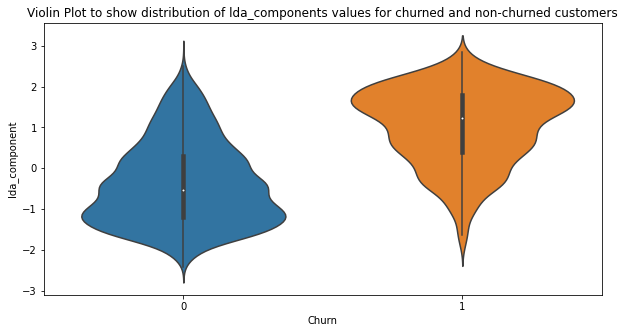

In [ ]:

plt.figure(figsize=(10, 5))
plt.title('Violin Plot to show distribution of lda_components values for churned and non-churned customers')
sns.violinplot(x="Churn", y="lda_component", data=plot_df)

Text(0, 0.5, 'Lda_component')

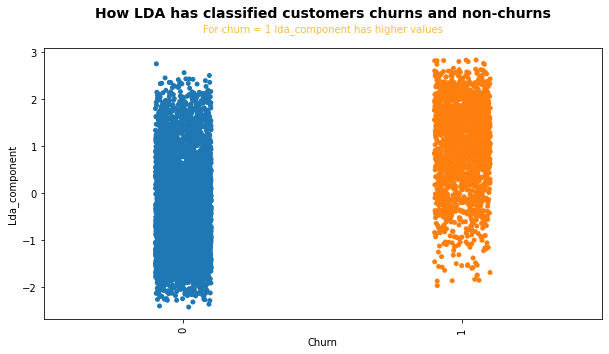

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.stripplot(x="Churn", y="lda_component", jitter = True, data=plot_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.text(x=0.5, y=1.1, s='How LDA has classified customers churns and non-churns', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='For churn = 1 lda_component has higher values', fontsize=10, alpha=0.75,color='orange', ha='center', va='bottom', transform=ax.transAxes)
ax.set_xlabel('Churn', fontsize = 10)
ax.set_ylabel('Lda_component', fontsize = 10)

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)

tsne_features = model.fit_transform(df)
#print(tsne_features.head())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


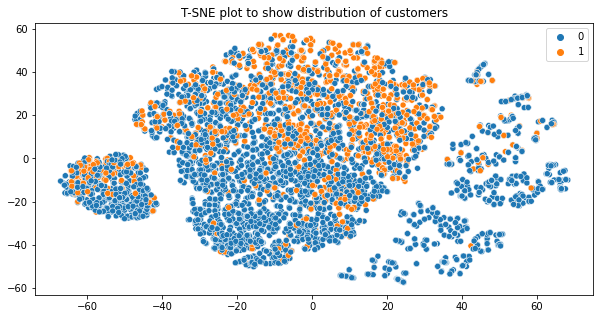

In [ ]:

plt.figure(figsize=(10, 5))
plt.title('T-SNE plot to show distribution of customers')
sns.scatterplot(x = tsne_features[:,0], y = tsne_features[:,1], hue = y)
plt.show()

In [ ]:

df.shape

(7043, 45)

In [ ]:

y_train.shape

(5282,)

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 23.4 MB/s 
     |████████████████████████████████| 199 kB 37.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
#importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
X_over_sampling = X.copy()
scaler = StandardScaler()
X_over_sampling = pd.DataFrame(scaler.fit_transform(X_over_sampling))

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Length: 7043, dtype: int64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_over_sampling,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [ ]:

y_pr=rnd_clf.predict(X_test)
print(accuracy_score(y_pr,y_test))
print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

0.6933560477001703
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1294
           1       0.45      0.75      0.56       467

    accuracy                           0.69      1761
   macro avg       0.67      0.71      0.66      1761
weighted avg       0.77      0.69      0.71      1761



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[871, 423],
       [117, 350]])

In [ ]:
X = telco_data.copy().drop(columns = ['customerID'])
y = X['Churn']

labelencoder = LabelEncoder()
y = pd.Series(labelencoder.fit_transform(y))

dummy_cols = object_columns.copy()
dummy_cols.remove('Churn')

X =  pd.get_dummies(X, columns = dummy_cols).drop(columns = ['Churn'])

In [ ]:
#importing adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
X_over_sampling_adasyn = X.copy()
scaler = StandardScaler()
X_over_sampling_adasyn = pd.DataFrame(scaler.fit_transform(X_over_sampling_adasyn))

In [ ]:
X_over_sampling_adasyn.shape

(7043, 45)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over_sampling_adasyn,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [ ]:
def makeOverSamplesADASYN(X,y):

  from imblearn.over_sampling import ADASYN 
  sm = ADASYN()
  X, y = sm.fit_sample(X, y)
  return(X,y)

In [ ]:
y_pr=rnd_clf.predict(X_test)
print(accuracy_score(y_pr,y_test))
print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

0.6933560477001703
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1294
           1       0.45      0.75      0.56       467

    accuracy                           0.69      1761
   macro avg       0.67      0.71      0.66      1761
weighted avg       0.77      0.69      0.71      1761



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[871, 423],
       [117, 350]])